In [1]:
import pandas as pd
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import math
import statistics
from statistics import mode
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import numpy as np
import scipy.spatial
from collections import Counter

In [2]:
df=pd.read_csv(r"C:\Users\jiten\Downloads\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [66]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
cat_cols=[i for i in df.columns if df[i].dtypes=='object']

In [10]:
print(cat_cols)

['sex', 'smoker', 'region']


In [11]:
for i in cat_cols:
    print("column name is ",i)
    print("unique values are ", df[i].unique())

column name is  sex
unique values are  ['female' 'male']
column name is  smoker
unique values are  ['yes' 'no']
column name is  region
unique values are  ['southwest' 'southeast' 'northwest' 'northeast']


In [12]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [13]:
df.isnull().sum()/len(df)*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [14]:
df.sex.value_counts()


male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

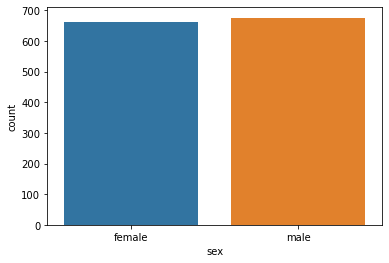

In [15]:
sns.countplot(df.sex)

In [16]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

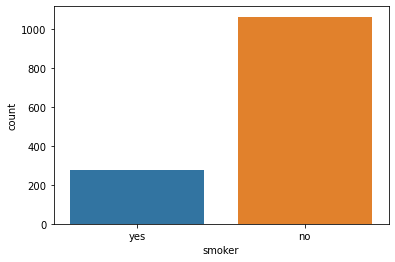

In [17]:
sns.countplot(df.smoker)

In [18]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

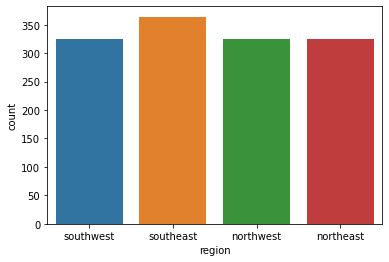

In [19]:
sns.countplot(df.region)

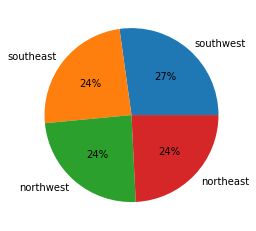

In [20]:
plt.pie(df.region.value_counts(),labels=['southwest','southeast','northwest','northeast'],autopct='%.0f%%');

In [21]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

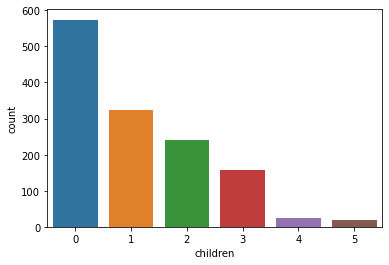

In [22]:
sns.countplot(df.children)

<AxesSubplot:>

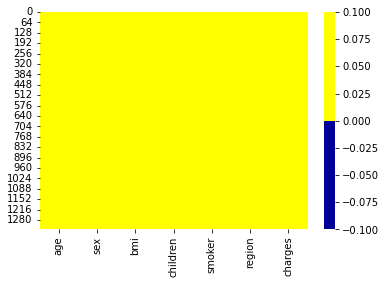

In [23]:
cols = df.columns[:31] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

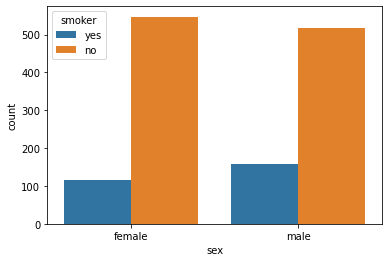

In [24]:
sns.countplot(x ='sex', hue = "smoker", data = df)
plt.show()
#more male smokers

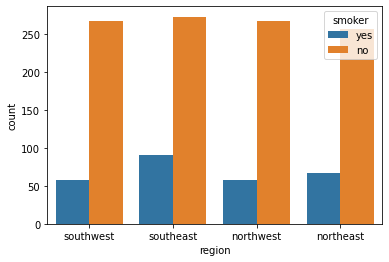

In [25]:
sns.countplot(x ='region', hue = "smoker", data = df)
plt.show()
#HIghest smokers in southeast

<function matplotlib.pyplot.show(close=None, block=None)>

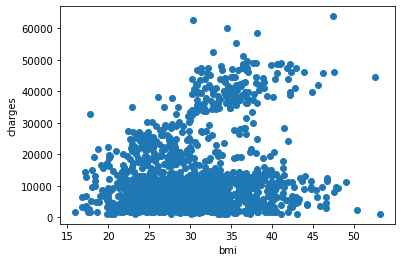

In [26]:
plt.scatter(df['bmi'],df['charges'])
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show

In [27]:
df1=df[df['sex']=='male']

<function matplotlib.pyplot.show(close=None, block=None)>

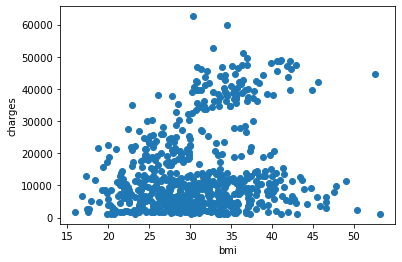

In [28]:
plt.scatter(df1['bmi'],df1['charges'])
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show

In [29]:
df2=df[df['sex']=='female']

<function matplotlib.pyplot.show(close=None, block=None)>

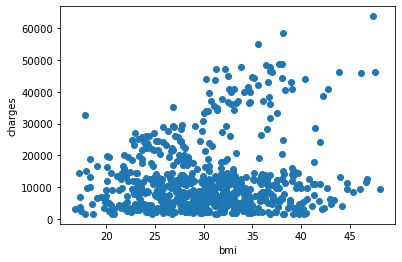

In [30]:
plt.scatter(df2['bmi'],df2['charges'])
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show

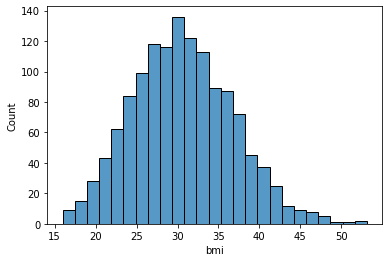

In [31]:
sns.histplot(x='bmi', data=df, )
plt.show()

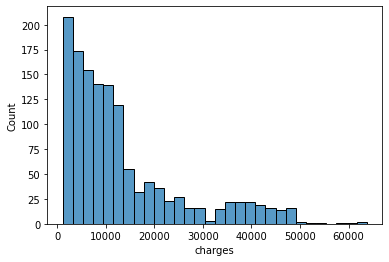

In [32]:
sns.histplot(x='charges', data=df, )
plt.show()

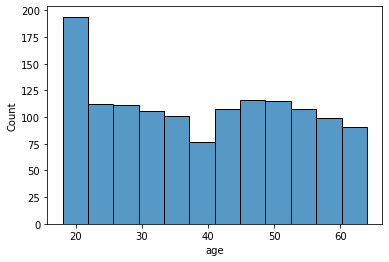

In [33]:
sns.histplot(x='age', data=df, )
plt.show()

<AxesSubplot:xlabel='smoker', ylabel='charges'>

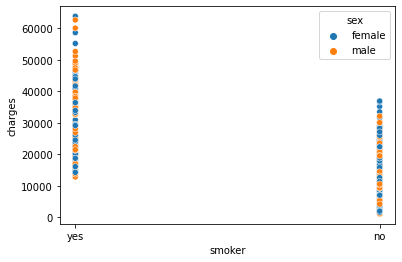

In [34]:
sns.scatterplot( y="charges", x='smoker', data=df,
                hue='sex')
  

In [35]:
x_count=[]
for i in range(1,1339):
    x_count.append(i)

Text(0.5, 0, 'count')

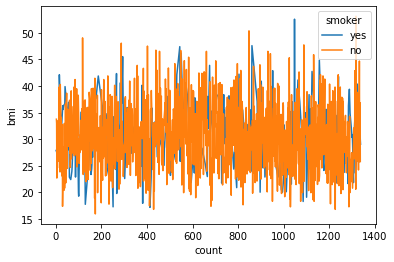

In [36]:
sns.lineplot(y=df['bmi'],x=x_count,hue=df['smoker']);
plt.ylabel("bmi")
plt.xlabel("count")

Text(0.5, 0, 'count')

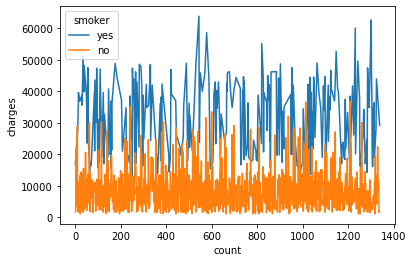

In [37]:
sns.lineplot(y=df['charges'],x=x_count,hue=df['smoker']);
plt.ylabel("charges")
plt.xlabel("count")

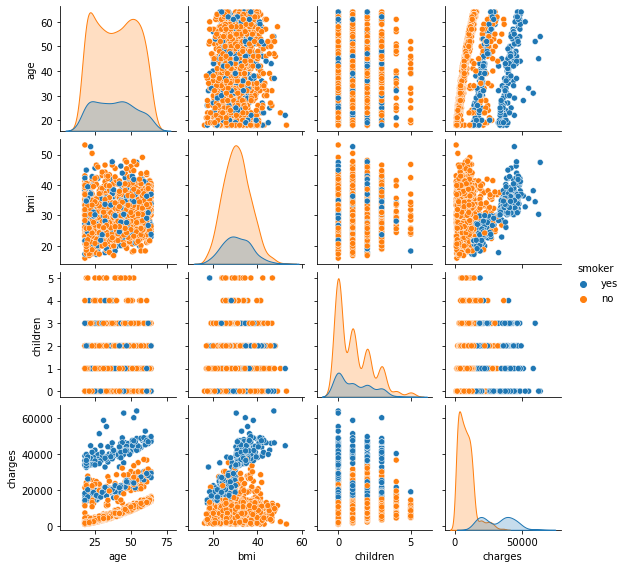

In [38]:
sns.pairplot(df, hue='smoker', height=2)

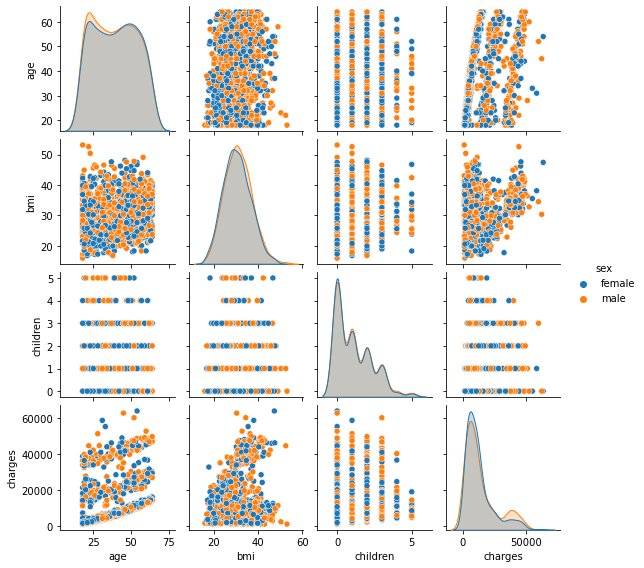

In [39]:
sns.pairplot(df, hue='sex', height=2)

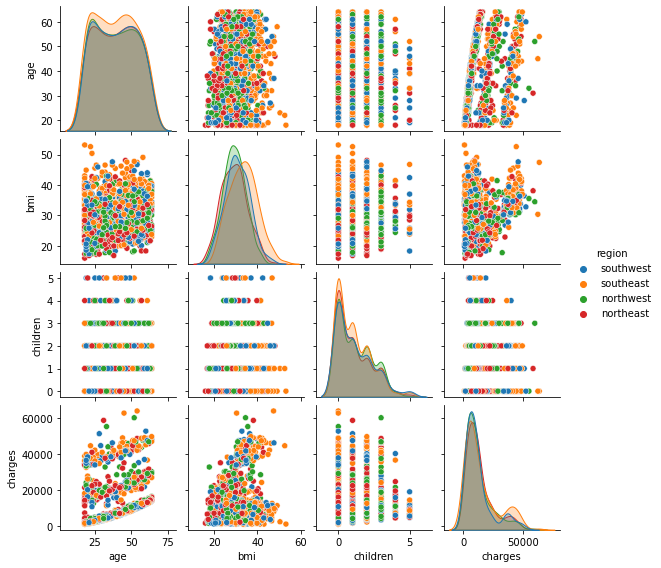

In [40]:
sns.pairplot(df, hue='region', height=2)

Text(0.5, 0, 'age')

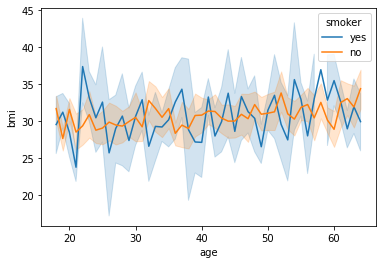

In [41]:
sns.lineplot(y=df['bmi'],x=df['age'],hue=df['smoker']);
plt.ylabel("bmi")
plt.xlabel("age")

Text(0.5, 0, 'age')

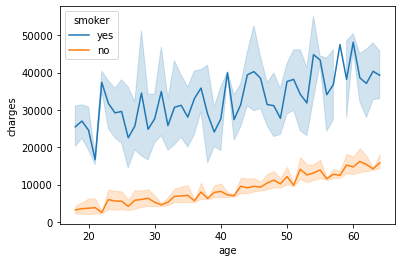

In [42]:
sns.lineplot(y=df['charges'],x=df['age'],hue=df['smoker']);
plt.ylabel("charges")
plt.xlabel("age")

Text(0.5, 0, 'age')

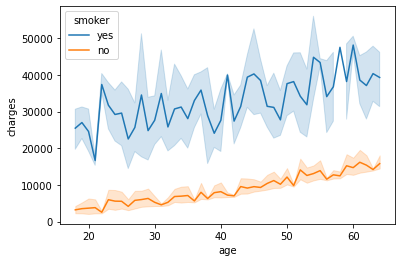

In [43]:
sns.lineplot(y=df['charges'],x=df['age'],hue=df['smoker']);
plt.ylabel("charges")
plt.xlabel("age")

Text(0.5, 0, 'age')

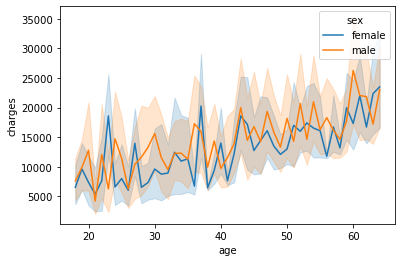

In [44]:
sns.lineplot(y=df['charges'],x=df['age'],hue=df['sex']);
plt.ylabel("charges")
plt.xlabel("age")

Text(0.5, 0, 'age')

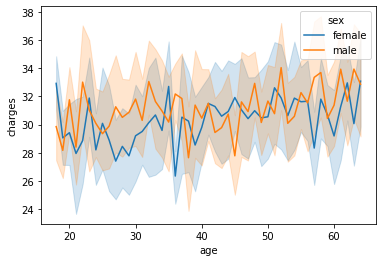

In [45]:
sns.lineplot(y=df['bmi'],x=df['age'],hue=df['sex']);
plt.ylabel("charges")
plt.xlabel("age")

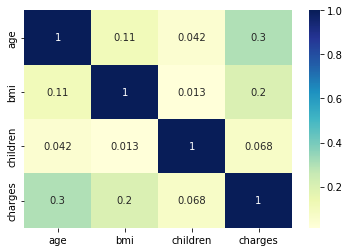

In [46]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

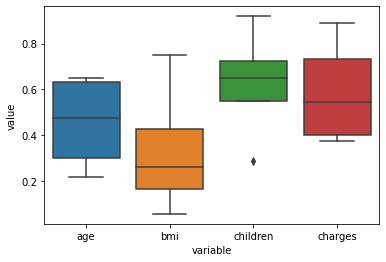

In [47]:
df_ = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['age','bmi','children','charges'])

sns.boxplot(x="variable", y="value", data=pd.melt(df_))

plt.show()

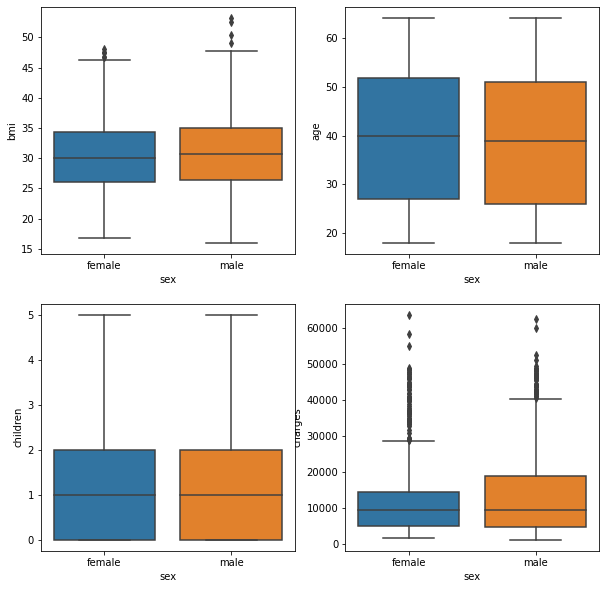

In [48]:
def graph(y):
    sns.boxplot(x='sex',y=y,data=df)
plt.figure(figsize=(10,10))    

plt.subplot(222)
graph('age')

plt.subplot(224)
graph('charges')

plt.subplot(221)
graph('bmi')

plt.subplot(223)
graph('children')


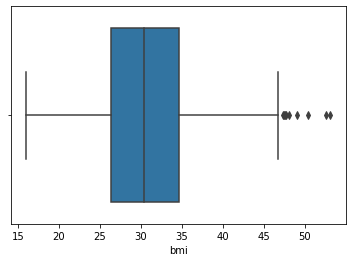

In [49]:
sns.boxplot(df['bmi'])
plt.show()

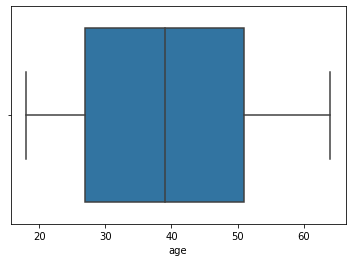

In [50]:
sns.boxplot(df['age'])
plt.show()

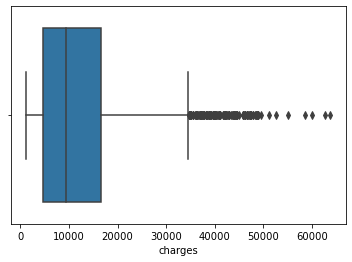

In [51]:
sns.boxplot(df['charges'])
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='sex'>

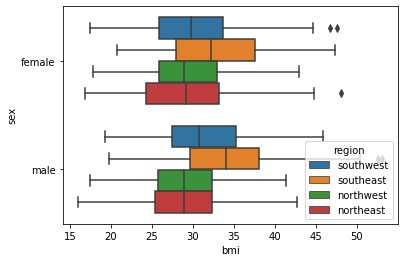

In [52]:
sns.boxplot(x ="bmi",
             y ="sex",
             hue ="region",
             data = df)

In [53]:
def lower_limit(i):
    x = df[i].quantile(0.25) - 1.5*(df[i].quantile(0.75)-df[i].quantile(0.25))
    indexes = df[df[i]<x].index.to_list()
    df[i][indexes] = x

In [54]:
def upper_limit(i):
    x = df[i].quantile(0.75) + 1.5*(df[i].quantile(0.75)-df[i].quantile(0.25))
    indexes = df[df[i]>x].index.to_list()
    df[i][indexes] = x

In [55]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
col=df.columns
col=col.drop(['sex','smoker','region','age'])
for i in col:
    lower_limit(i)
    upper_limit(i)

<AxesSubplot:xlabel='charges'>

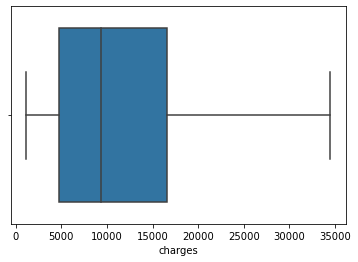

In [57]:
sns.boxplot(df['charges'])

<AxesSubplot:xlabel='bmi'>

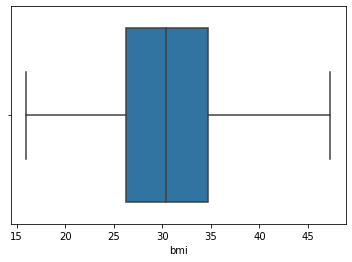

In [58]:
sns.boxplot(df['bmi'])

In [62]:
df_hotencode = pd.get_dummies(df, columns = ['sex','smoker','region'])
print(df_hotencode)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

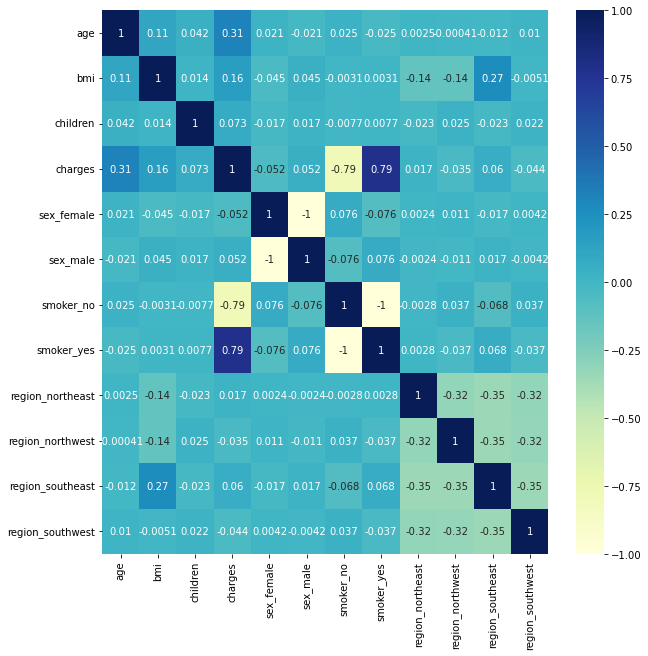

In [101]:
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(df_hotencode.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [84]:
X=df_hotencode.copy()
Y=df_hotencode[['charges']].copy()


In [85]:
print(X)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

In [86]:
X.drop(['charges'], inplace= True, axis=1)


In [87]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [88]:
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [96]:
Y_predicted = lr.predict(X)

In [97]:
mse=mean_squared_error(Y,Y_predicted)
  
rmse = np.sqrt(mean_squared_error(Y, Y_predicted))
r2 = r2_score(Y, Y_predicted)
  
# printing values
print('Slope:' ,lr.coef_)
print('Intercept:', lr.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[  230.603441     236.44096187   390.82433201    32.89895532
    -32.89895532 -9911.91342094  9911.91342094   538.31403038
     71.39269324  -329.35203617  -280.35468745]]
Intercept: [1677.95150356]
MSE: 26025261.422337007
Root mean squared error:  5101.495998463294
R2 score:  0.7475946283491712


In [ ]:
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(df_hotencode.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [102]:
from sklearn import linear_model
alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, Y_train)
    train_errors.append(enet.score(X_train, Y_train))
    test_errors.append(enet.score(X_test, Y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, Y).coef_

Optimal regularization parameter : 1e-05


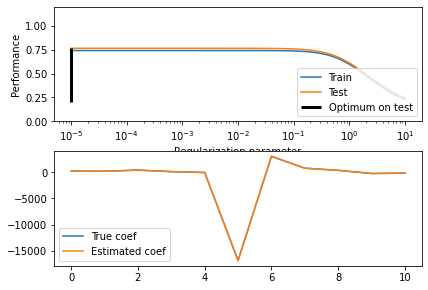

In [104]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label="Train")
plt.semilogx(alphas, test_errors, label="Test")
plt.vlines(
    alpha_optim,
    plt.ylim()[0],
    np.max(test_errors),
    color="k",
    linewidth=3,
    label="Optimum on test",
)
plt.legend(loc="lower right")
plt.ylim([0, 1.2])
plt.xlabel("Regularization parameter")
plt.ylabel("Performance")

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef_, label="True coef")
plt.plot(coef_, label="Estimated coef")
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()